In [1]:
import statsmodels.formula.api as smf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv("E:\\data science\\assiments\\4\\delivery_time.csv")


In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### EDA and Data Visualization

In [4]:
data=data.rename({'Sorting Time':"Sortingtime"},axis=1)

In [5]:
data=data.rename({'Delivery Time':"Deliverytime"},axis=1)

In [6]:
data

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


array([[<AxesSubplot:title={'center':'Deliverytime'}>,
        <AxesSubplot:title={'center':'Sortingtime'}>]], dtype=object)

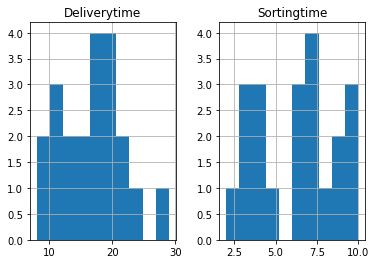

In [7]:
data.hist()

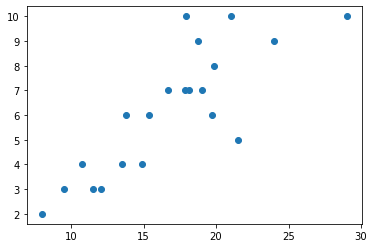

In [8]:
plt.scatter(data.Deliverytime,data.Sortingtime)

### Correlation

In [9]:
data.corr()

,Deliverytime,Sortingtime
Deliverytime,1.000000,0.825997
Sortingtime,0.825997,1.000000


### Model Building

In [10]:
model=smf.ols('Deliverytime~Sortingtime',data=data).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        02:04:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
model1=smf.ols('Deliverytime~np.log(Sortingtime)',data=data).fit()

In [134]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.64e-06
Time:                        16:09:08   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
model2=smf.ols('np.log(Deliverytime)~Sortingtime',data=data).fit()

In [138]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Sun, 10 Oct 2021   Prob (F-statistic):           1.59e-06
Time:                          16:10:02   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
Sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
model3=smf.ols('Deliverytime~Sortingtime+Sortingtime^2',data=data).fit()

In [145]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     20.84
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.07e-05
Time:                        16:12:13   Log-Likelihood:                -50.811
No. Observations:                  21   AIC:                             107.6
Df Residuals:                      18   BIC:                             110.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7837      1.736      3.909      0.001       3.137      10.430
Sortingtime         1.3190      0.424      3.109      0.006       0.428       2.210
Sortingtime ^ 2     0.3334      0.340      0.981      0.340      -0.381       1.048
==============================================================================
Omnibus:                        3.228   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.811
Skew:                           0.703   Prob(JB):                        0.404
Kurtosis:                       3.301   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
model4=smf.ols('Deliverytime~Sortingtime+Sortingtime^2+Sortingtime^3',data=data).fit()

In [143]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     13.62
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           8.85e-05
Time:                        16:12:06   Log-Likelihood:                -50.533
No. Observations:                  21   AIC:                             109.1
Df Residuals:                      17   BIC:                             113.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7338      1.764      3.817      0.001       3.012      10.456
Sortingtime         1.3162      0.431      3.055      0.007       0.407       2.225
Sortingtime ^ 2     0.7913      0.762      1.039      0.313      -0.815       2.398
Sortingtime ^ 3    -0.4419      0.655     -0.675      0.509      -1.824       0.940
==============================================================================
Omnibus:                        4.638   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                2.707
Skew:                           0.828   Prob(JB):                        0.258
Kurtosis:                       3.595   Cond. No.                         30.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model2 is best as it has high R-squared value

#### R-squared:	0.711
#### Adj. R-squared:	0.696

### Prediction and Mean of error

In [ ]:
pred=model2.predict(data)

In [163]:
pred

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [169]:
y=np.log(data.Deliverytime)

In [170]:
error=y-pred

In [171]:
error.mean()

-9.30472630162036e-16

#### Prediction for new data

In [172]:
newdata=({'Sortingtime':13})

In [173]:
model2.predict(newdata)

0    3.493543
dtype: float64